<a href="https://colab.research.google.com/github/KanoknatKr/python_dataviz2024/blob/main/final_dataviz_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

โหลดข้อมูล Metabolites จำนวน 51 samples จาก https://drive.google.com/drive/folders/18BGc4-dxHwuSB6ep3PmHa688Fiww23CI?usp=sharing
ซี่งประกอบด้วยค่า X ขนาด 51x65536 ซึ่งเป็นค่าความเข้มข้นขององค์ประกอบ และ ppm ขนาด 65536 ซึ่งเป็นค่า Chemical shift
ดังรูป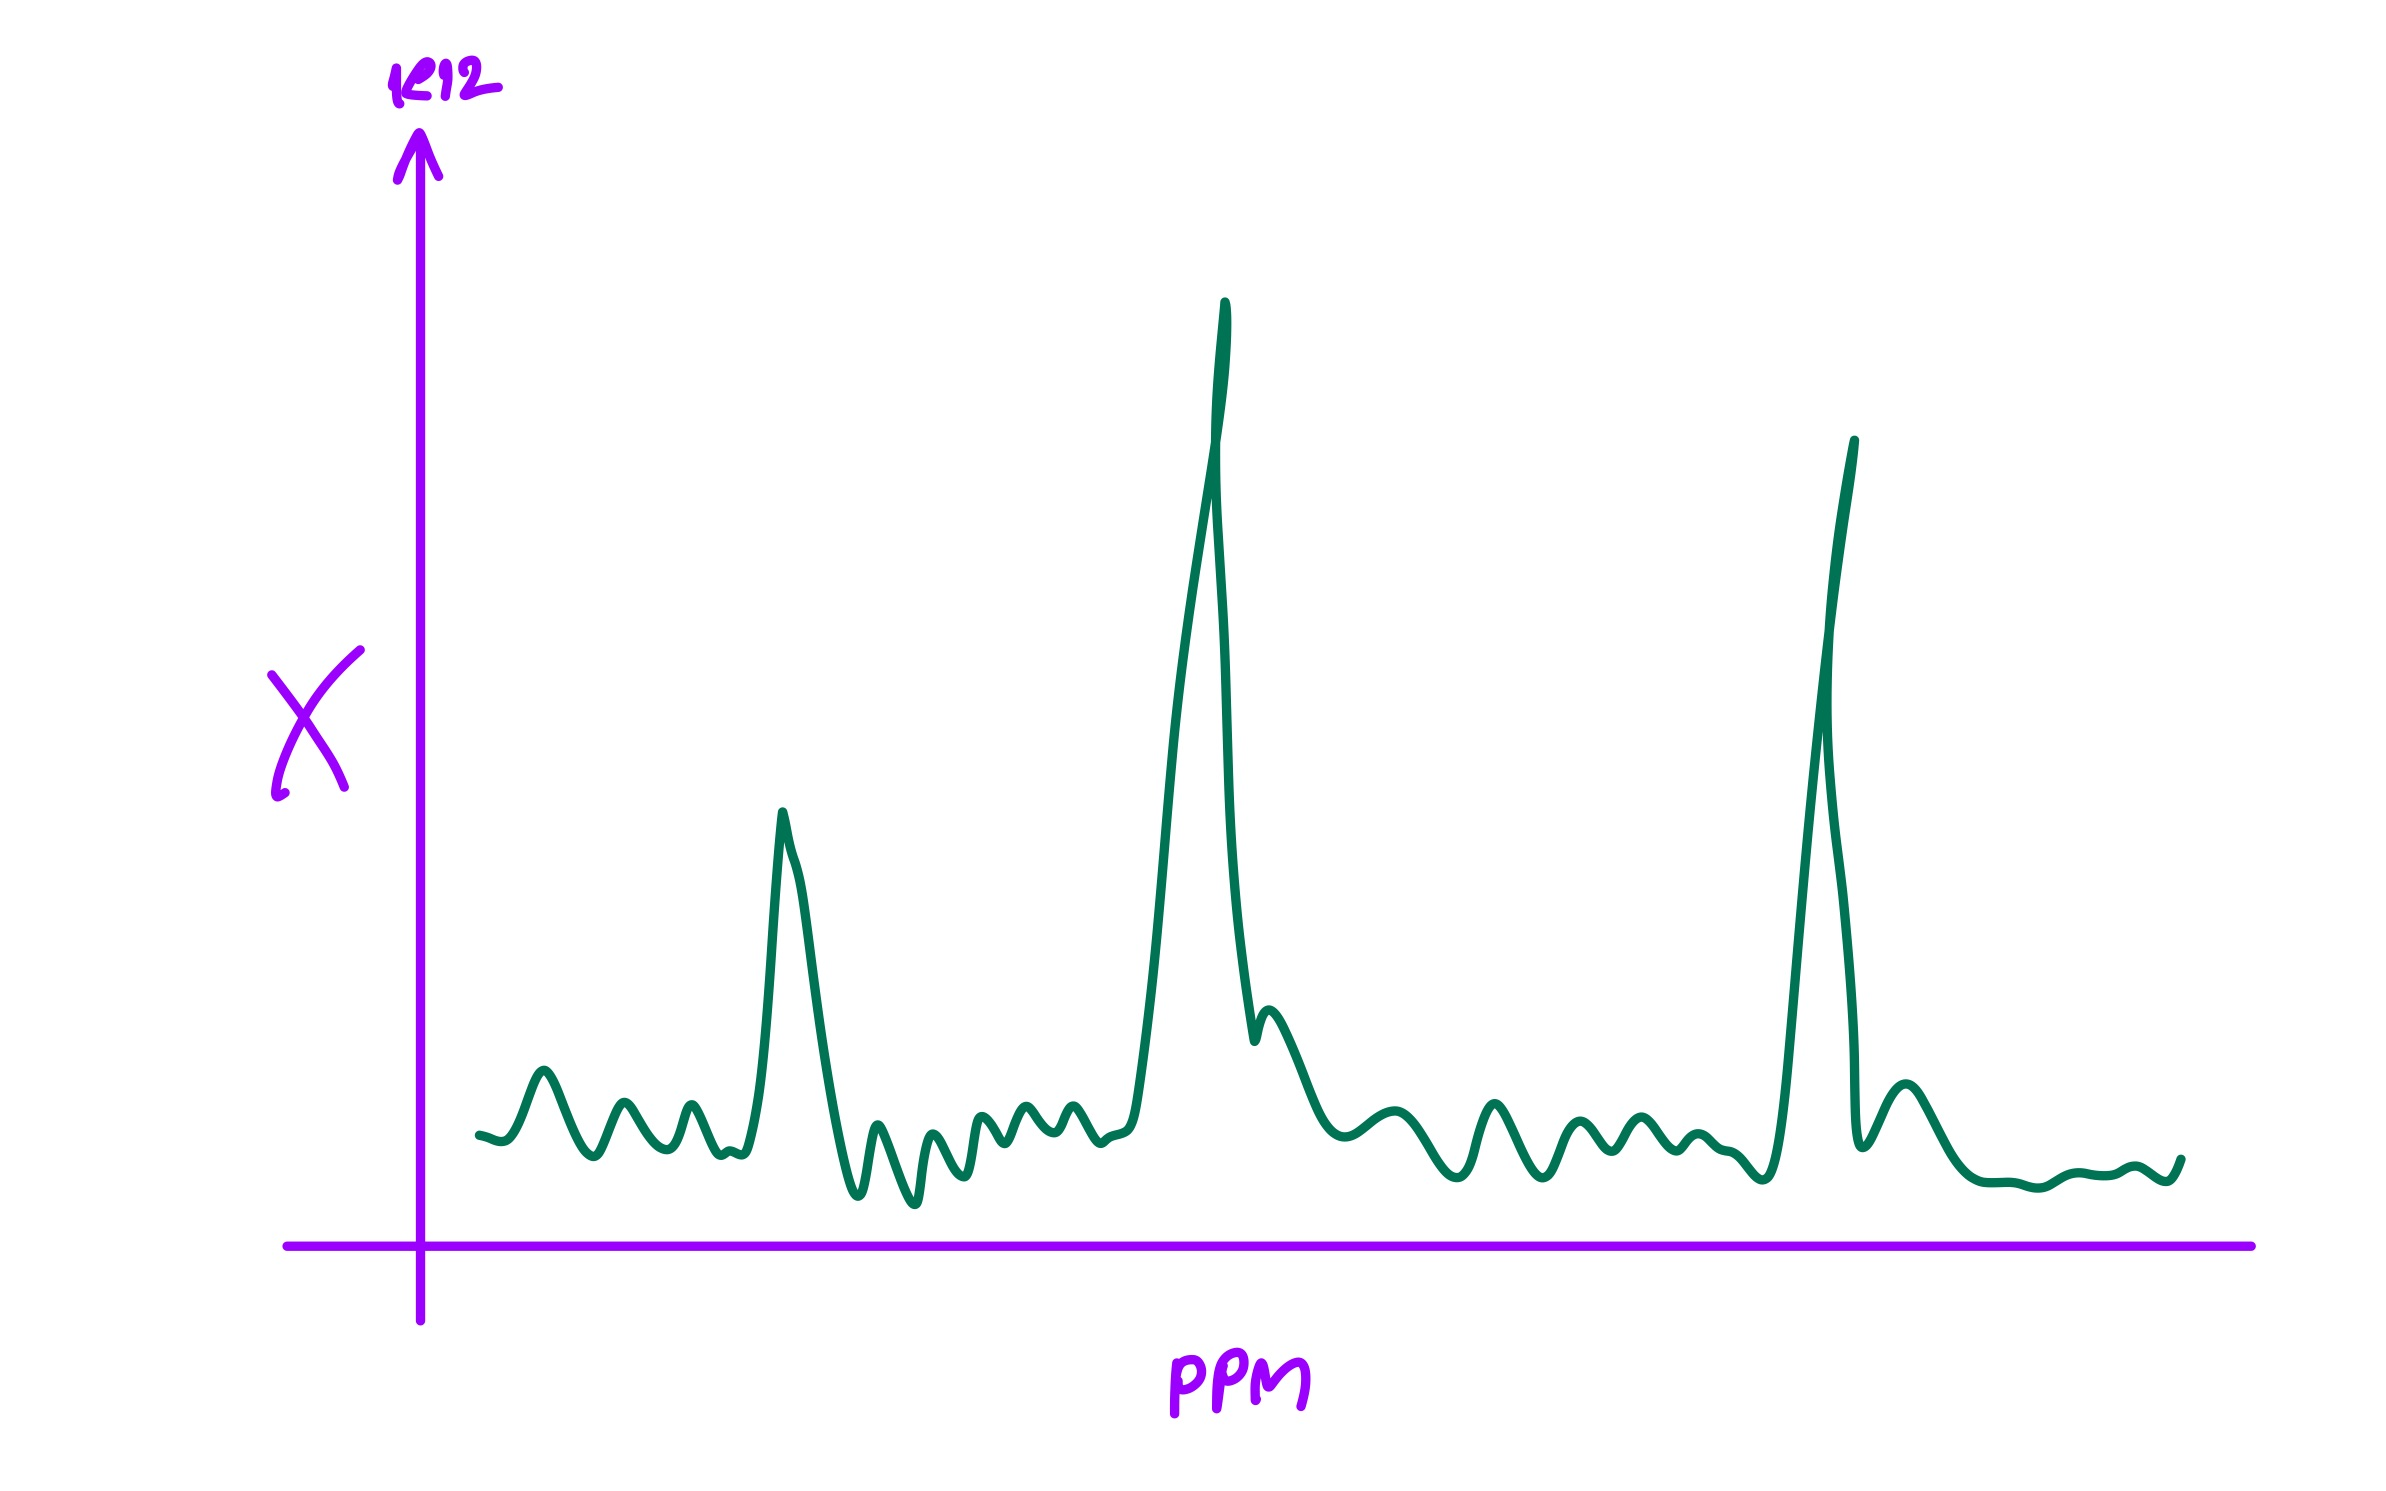

จัดการข้อมูลโดย 1 ตัด ข้อมูลที่อยู่นอกช่วงที่สนใจ (ppm $\leq$ 0 และ ppm $\geq$ 9.5)
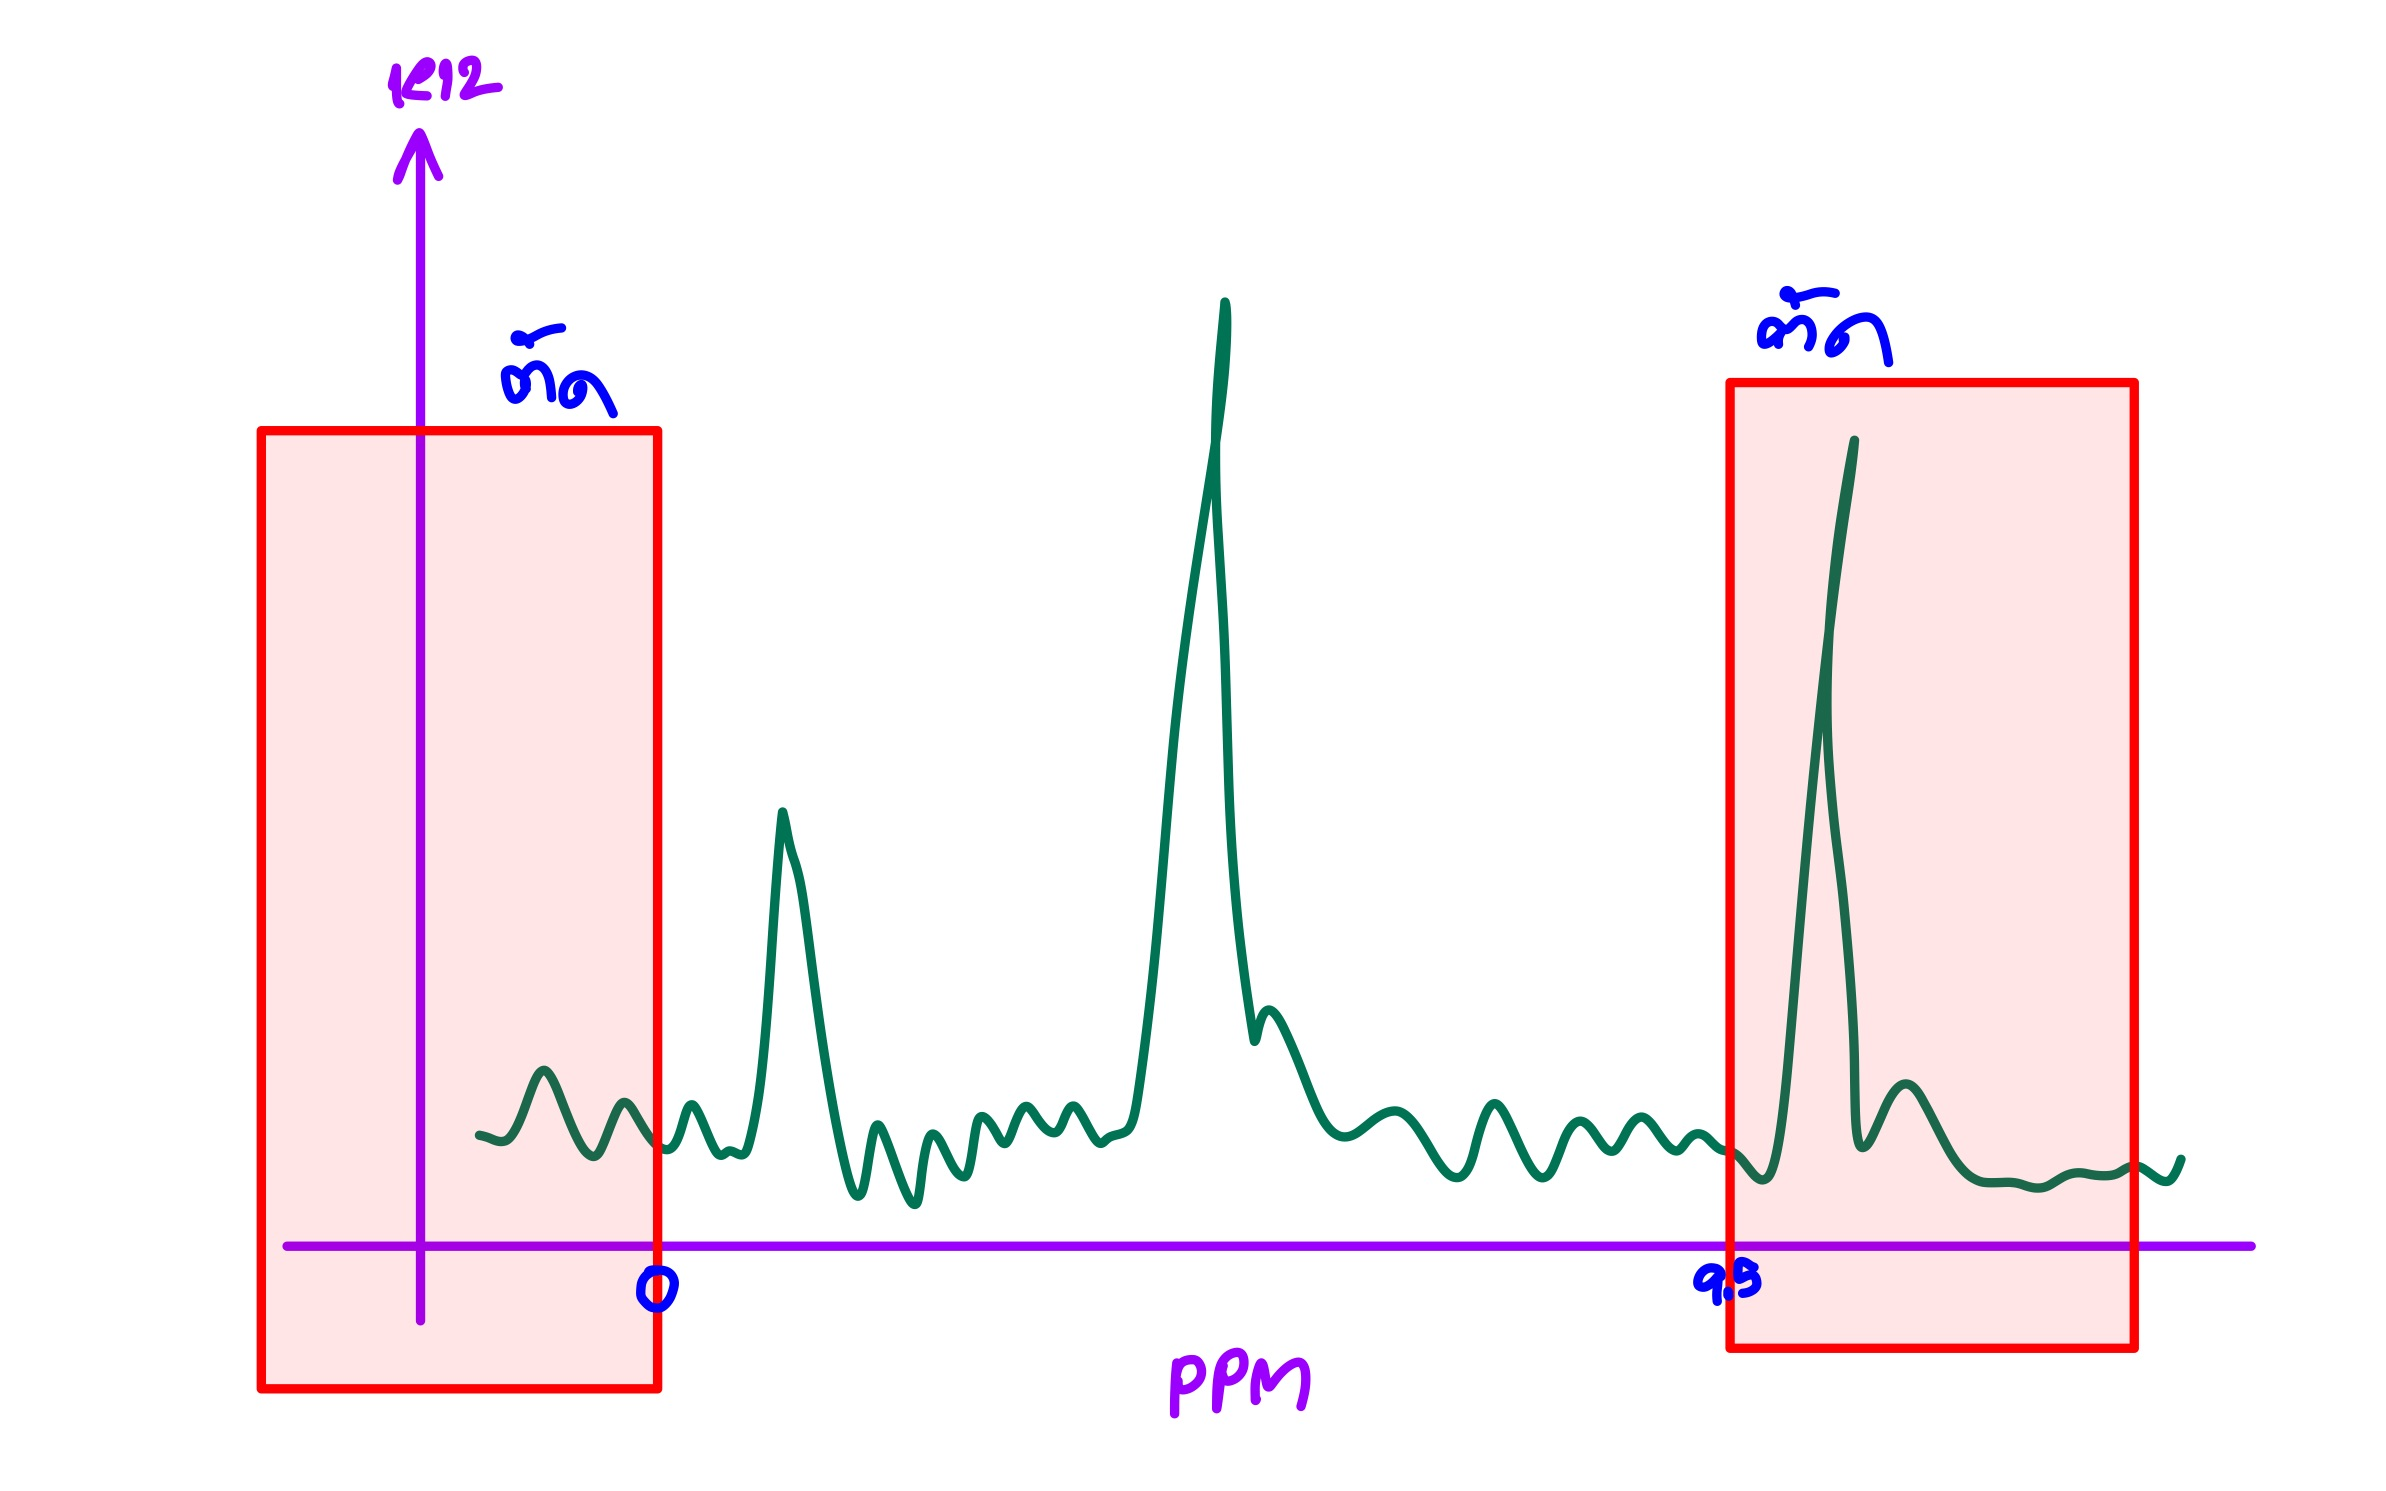

และ 2 quantize ข้อมูลโดยลดจำนวนข้อมูล ให้เหลือเพียง 51 x 400 โดยรวมข้อมูลที่อยู่ข้างกันและเลือกค่า max X
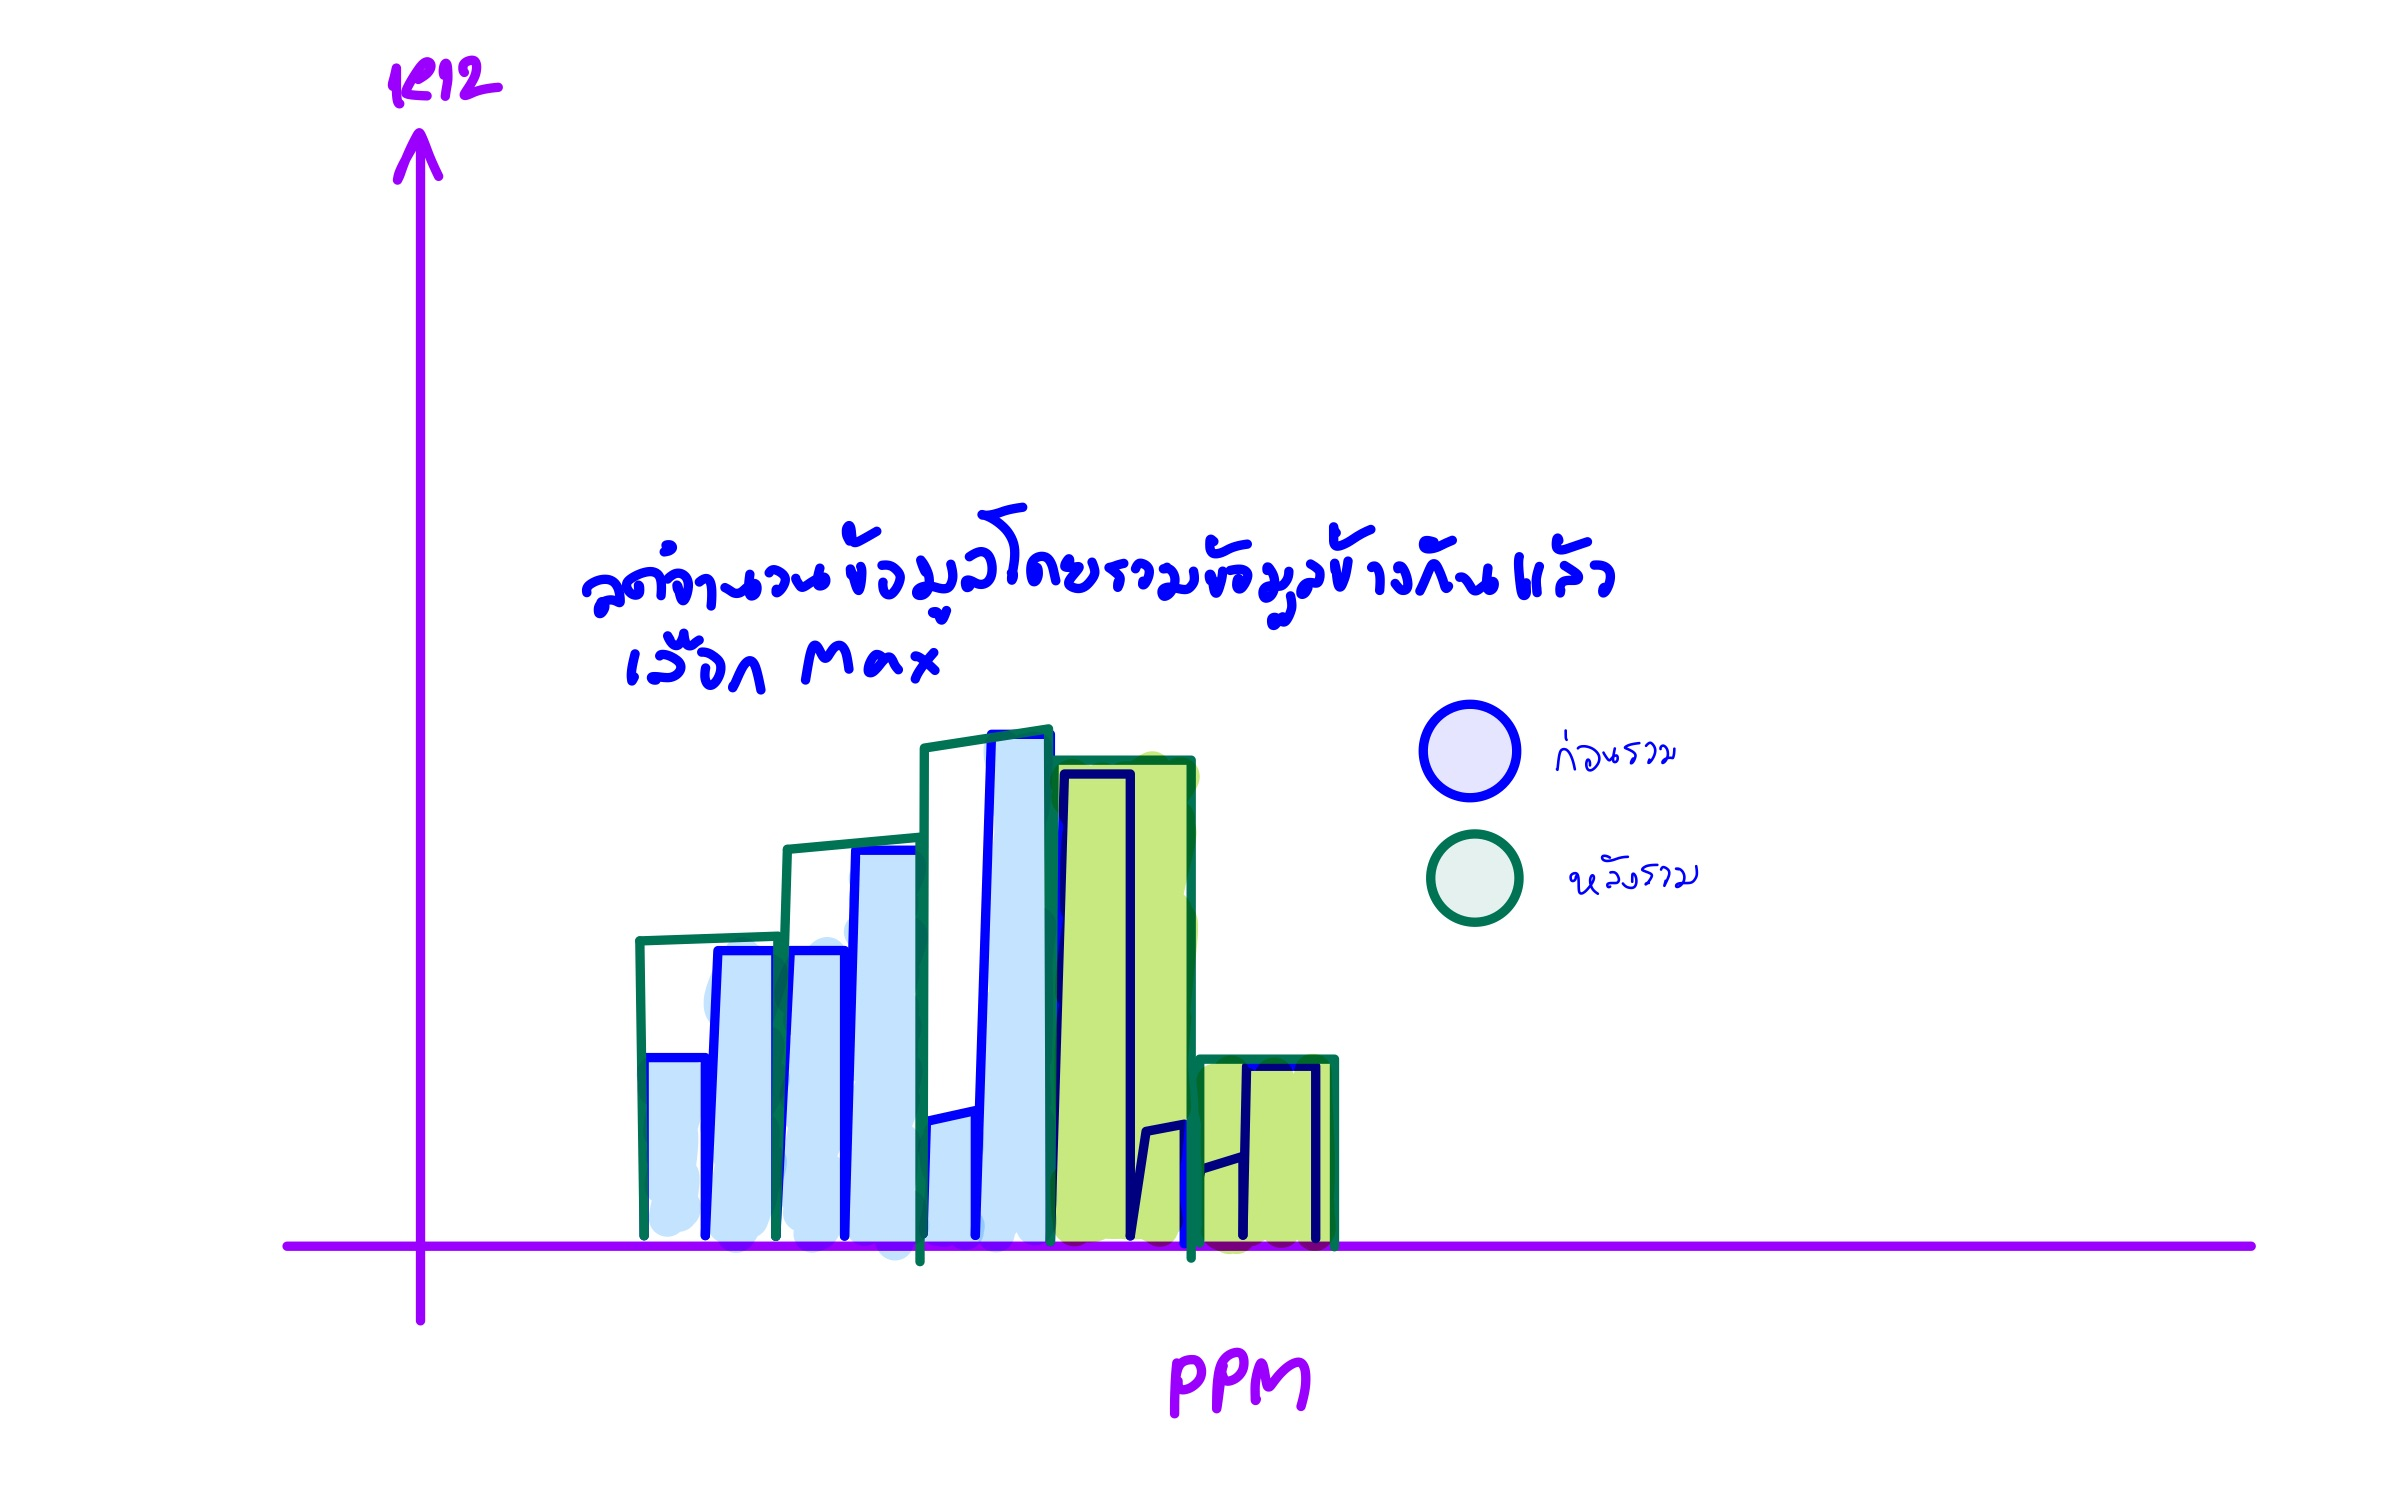

ข้อสอบ
0. preprocess ข้อมูลตามคำแนะนำข้างบน
1. ทำ PCA ข้อมูลเพื่อให้สามารถ visualize ได้
2. visualize ข้อมูลทั้ง 51 จุด เพื่อดูการจัดกลุ่มของข้อมูลเบื้องต้น
3. ตอบคำถามว่า data มีทั้งหมดกี่กลุ่ม โดย plot จุดข้อมูลแต่ละกลุ่มเป็นคนละสี
4. สร้าง ตารางที่มี column บอกว่า data แต่ละจุดนั้นอยู่กลุ่มไหน

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the pickle file
path = '/content/drive/MyDrive/Xnn_ppm.pickle'
data = pd.read_pickle(path)

In [71]:
data

(array([[ 1.36984969e+07,  1.36904279e+07,  1.27889682e+07, ...,
          1.88668440e+06,  3.11779437e+06,  3.34950400e+06],
        [ 8.55679993e+06,  7.90758455e+06,  7.28975667e+06, ...,
          1.36576000e+06,  1.36576000e+06,  1.36576000e+06],
        [ 4.74035200e+06,  4.74035200e+06,  4.74035200e+06, ...,
         -2.02200274e+06, -2.32252840e+06, -3.07843664e+06],
        ...,
        [ 3.86329400e+07,  3.86329400e+07,  3.86329400e+07, ...,
         -4.37613458e+08, -4.38095321e+08, -4.40187284e+08],
        [ 9.94168277e+05,  9.94168277e+05,  9.94168277e+05, ...,
         -4.62360904e+05,  4.27633911e+05, -1.72847014e+06],
        [-1.41491086e+05, -1.41491086e+05, -1.41491086e+05, ...,
          1.16130230e+07,  1.16073431e+07,  8.35909427e+06]]),
 array([10.87128   , 10.87109488, 10.87090976, ..., -1.26026981,
        -1.26045493, -1.26064005]))

  # Preprocess ข้อมูลตามคำแนะนำข้างบน


<ipython-input-73-219d83e456e0>:44: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()  # ปรับเลย์เอาต์เพื่อให้มีพื้นที่สำหรับตำนาน
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


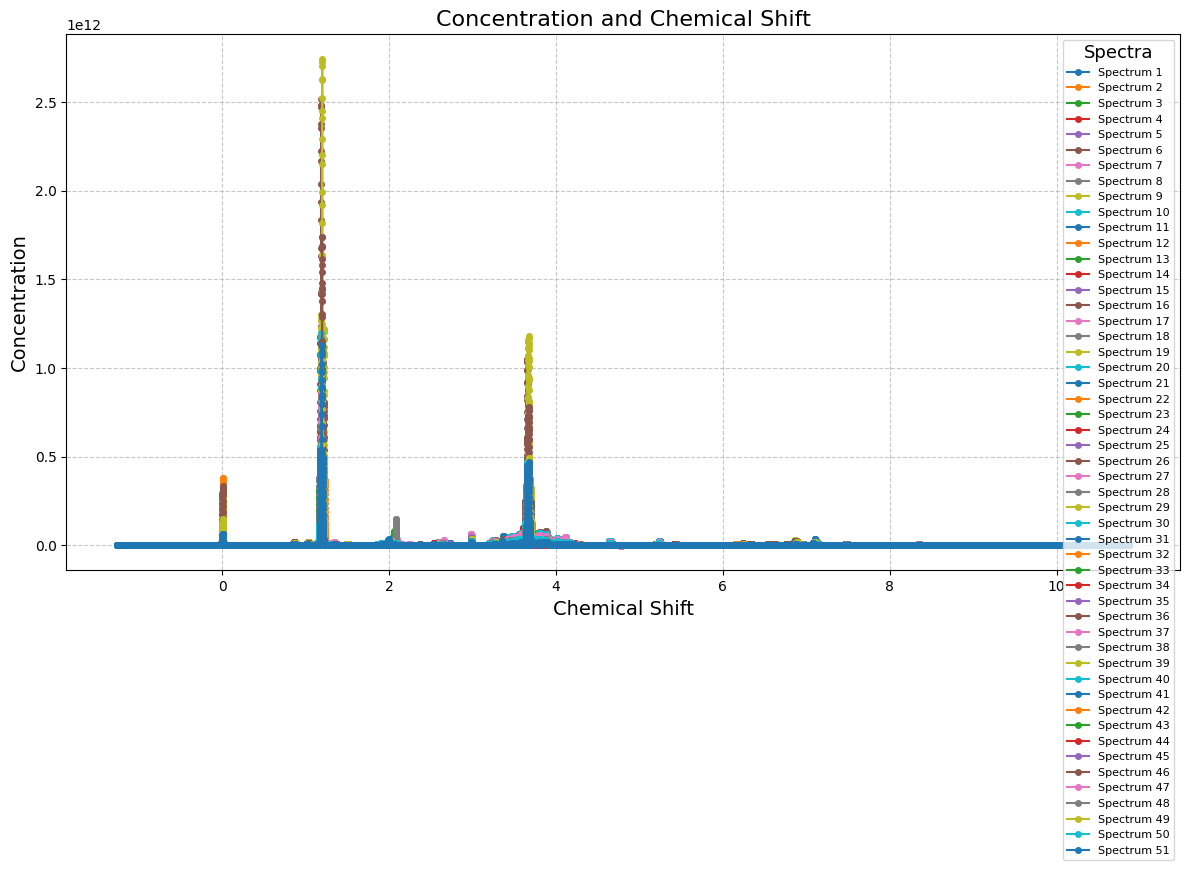

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# โหลดข้อมูลจากไฟล์ pickle
path = '/content/drive/MyDrive/Xnn_ppm.pickle'
data = pd.read_pickle(path)

# ตรวจสอบว่าข้อมูลเป็นแบบ dictionary หรือ tuple และดึงข้อมูลออกมา
if isinstance(data, dict):
    concentration_data = data.get('concentration')
    ppm_data = data.get('ppm')
elif isinstance(data, (tuple, list)):
    concentration_data = data[0]
    ppm_data = data[1]

# ตรวจสอบว่าตัวแปรถูกกำหนดแล้ว
if 'concentration_data' not in locals() or 'ppm_data' not in locals():
    raise ValueError("Could not extract concentration and ppm data from the pickle file.")

# ถ้า concentration_data เป็นอาเรย์ 1D ให้ปรับรูปแบบเป็น 2D สำหรับการ plot
if concentration_data.ndim == 1:
    concentration_data = concentration_data.reshape(1, -1)

# สร้างกราฟ
plt.figure(figsize=(12, 8))

# วาดกราฟ
for i in range(concentration_data.shape[0]):
    plt.plot(ppm_data, concentration_data[i], marker='o', linestyle='-', markersize=4, label=f'Spectrum {i+1}')

# ตั้งค่าป้ายชื่อและหัวเรื่อง
plt.xlabel('Chemical Shift', fontsize=14)
plt.ylabel('Concentration', fontsize=14)
plt.title('Concentration and Chemical Shift', fontsize=16)

# เพิ่มกริดเพื่อความอ่านง่ายขึ้น
plt.grid(True, linestyle='--', alpha=0.7)

# ปรับให้สวยงาม
plt.legend(title='Spectra', fontsize=8, title_fontsize='13')

# แสดงกราฟ
plt.tight_layout()  # ปรับเลย์เอาต์เพื่อให้มีพื้นที่สำหรับตำนาน
plt.show()

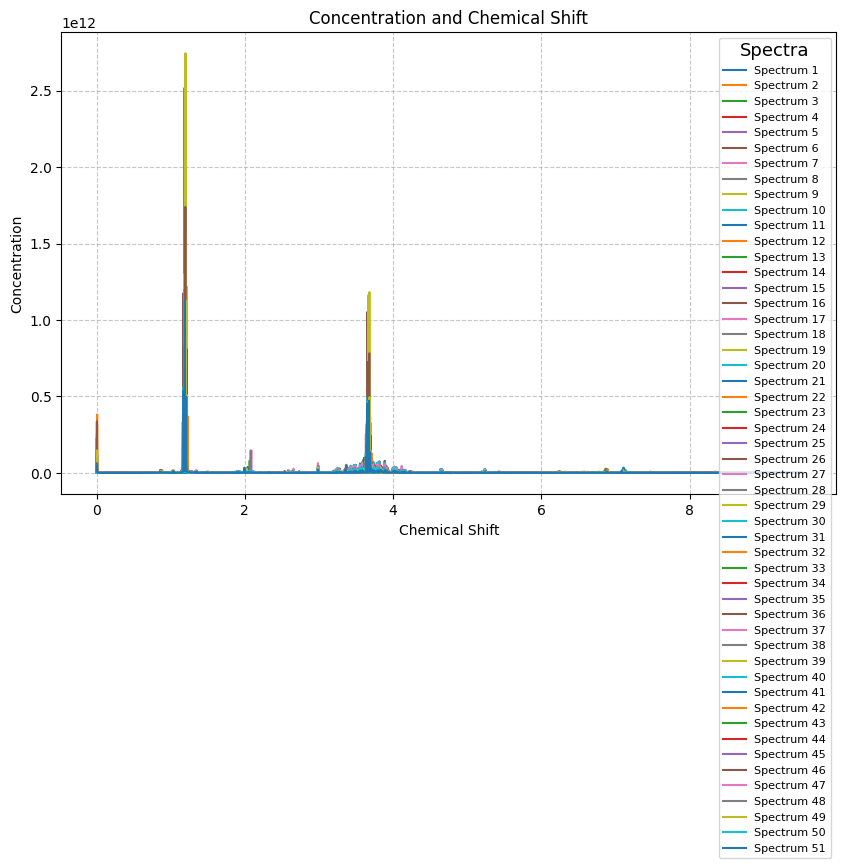

In [74]:
# 1. ถ้า 'data' เป็น dictionary
if isinstance(data, dict):
  concentration_data = data.get('concentration') # Use .get() to avoid KeyError if key is missing
  ppm_data = data.get('ppm')

# 2. ถ้า 'data' เป็น tuple หรือ list
elif isinstance(data, (tuple, list)):
  concentration_data = data[0]  # Assuming concentration is the first element
  ppm_data = data[1]          # Assuming ppm is the second element

# 3. ถ้า 'data' เป็น NumPy array และคุณรู้โครงสร้าง
# ตรวจสอบว่าตัวแปรถูกกำหนดแล้ว
if 'concentration_data' not in locals() or 'ppm_data' not in locals():
  raise ValueError("Could not extract concentration and ppm data from the pickle file.")

# กรองข้อมูลตามช่วง ppm (0 <= ppm <= 9.5)
valid_indices = (ppm_data >= 0) & (ppm_data <= 9.5)
filtered_ppm = ppm_data[valid_indices]
filtered_concentration = concentration_data[:, valid_indices]  # Assuming concentration is a 2D array

# ถ้า concentration_data เป็นอาเรย์ 1D ให้ปรับรูปแบบเป็น 2D สำหรับการ plot
if filtered_concentration.ndim == 1:
    filtered_concentration_data = filtered_concentration.reshape(1, -1)

# สร้างกราฟ
plt.figure(figsize=(10, 6))

# วาดกราฟ
for i in range(filtered_concentration_data.shape[0]):
  plt.plot(filtered_ppm, filtered_concentration_data[i], label=f'Spectrum {i+1}')

# กำหนดแกน x y
plt.xlabel('Chemical Shift')
plt.ylabel('Concentration')
plt.title('Concentration and Chemical Shift')

# เพิ่มกริดเพื่อความอ่านง่ายขึ้น
plt.grid(True, linestyle='--', alpha=0.7)

# ปรับให้สวยงาม
plt.legend(title='Spectra', fontsize=8, title_fontsize='13')

# แสดงกราฟ
plt.show()

In [80]:
filtered_concentration.shape

(51, 51318)

# จัดการข้อมูลให้เหลือ 51 x 400

In [247]:
# prompt: quantize ข้อมูลโดยลดจำนวนข้อมูล ให้เหลือเพียง 51 x 400 โดยรวมข้อมูลที่อยู่ข้างกันและเลือกค่า max X

new_ppm_data = []
new_concentration_data = []

# ขนาดของแต่ละกลุ่ม
group_size_ppm = len(filtered_ppm) // 400

# วนลูปผ่านแต่ละกลุ่ม
for i in range(400):
  start_index = i * group_size_ppm
  end_index = (i + 1) * group_size_ppm

  # คำนวณค่าเฉลี่ยของ ppm ในแต่ละกลุ่ม
  current_ppm_group = filtered_ppm[start_index:end_index]
  # หาค่า max X ในกลุ่ม
  new_ppm_data.append(np.max(current_ppm_group))

  # หาค่า Max concentration ในแต่ละกลุ่ม
  current_concentration_group = filtered_concentration[:, start_index:end_index]
  max_concentration_in_group = np.max(current_concentration_group, axis=1)
  new_concentration_data.append(max_concentration_in_group)

new_concentration_data = np.array(new_concentration_data).transpose()

# ตรวจสอบขนาดของข้อมูล
print("New concentration data shape :", new_concentration_data.shape)
print("New ppm data shape :", len(new_ppm_data))

New concentration data shape : (51, 400)
New ppm data shape : 400


In [234]:
new_concentration_data

array([[-1.09661551e+07, -1.47819376e+07, -1.32520133e+07, ...,
         1.45939172e+08,  2.84816430e+08,  1.11972151e+09],
       [-9.80232950e+06, -1.12563864e+07, -1.11179388e+07, ...,
         1.41795843e+08,  3.01300851e+08,  1.18119745e+09],
       [-7.89197892e+06, -7.54651974e+06, -6.89197365e+06, ...,
         1.64836722e+08,  3.38647994e+08,  1.35829862e+09],
       ...,
       [-6.39938371e+07, -5.32964310e+07, -6.01670823e+07, ...,
        -2.70779868e+08, -2.61279903e+08,  4.38097709e+08],
       [ 5.20920643e+07,  8.96035149e+07,  2.18613110e+08, ...,
         4.13522147e+07,  6.65719791e+07,  2.80633204e+08],
       [ 2.53153212e+07,  3.60221466e+07,  2.39985557e+07, ...,
         1.32403932e+08,  2.58355603e+08,  1.51610806e+09]])

# ทำ PCA ข้อมูลเพื่อให้สามารถ visualize ได้

In [242]:
# prompt: ทำ PCA ข้อมูลเพื่อให้สามารถ visualize ได้

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming new_concentration is your data matrix (51x400)
X = new_concentration_data

# Standardize the data
x = StandardScaler().fit_transform(X)

# Perform PCA with 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Visualize ข้อมูลทั้ง 51 จุด เพื่อดูการจัดกลุ่มของข้อมูลเบื้องต้น

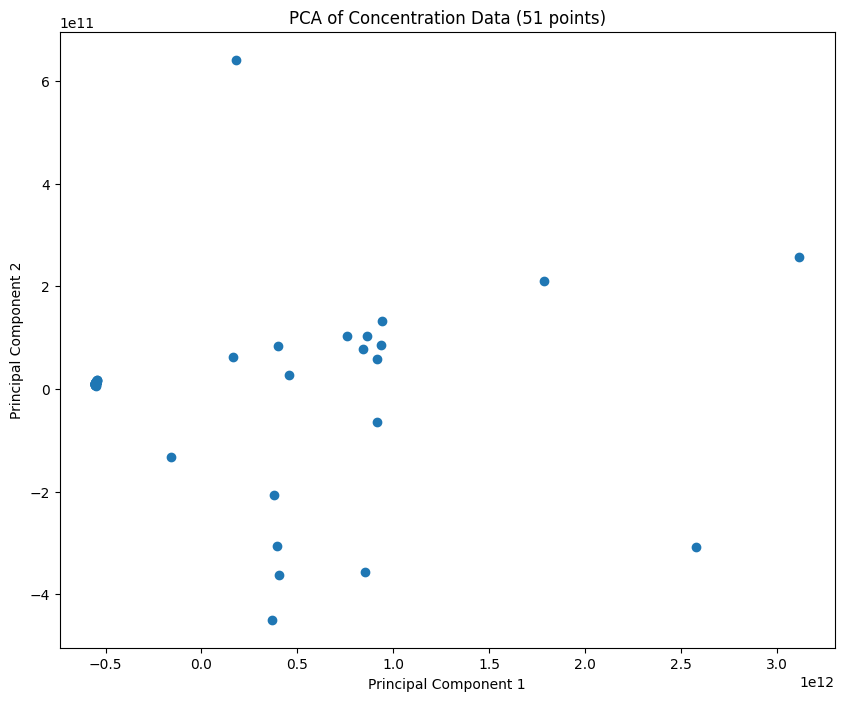

In [237]:
# prompt: visualize ข้อมูลทั้ง 51 จุด เพื่อดูการจัดกลุ่มของข้อมูลเบื้องต้น

# Assuming principalDf is your DataFrame with principal components
plt.figure(figsize=(10, 8))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Concentration Data (51 points)')
plt.show()

# ตอบคำถามว่า data มีทั้งหมดกี่กลุ่ม โดย plot จุดข้อมูลแต่ละกลุ่มเป็นคนละสี

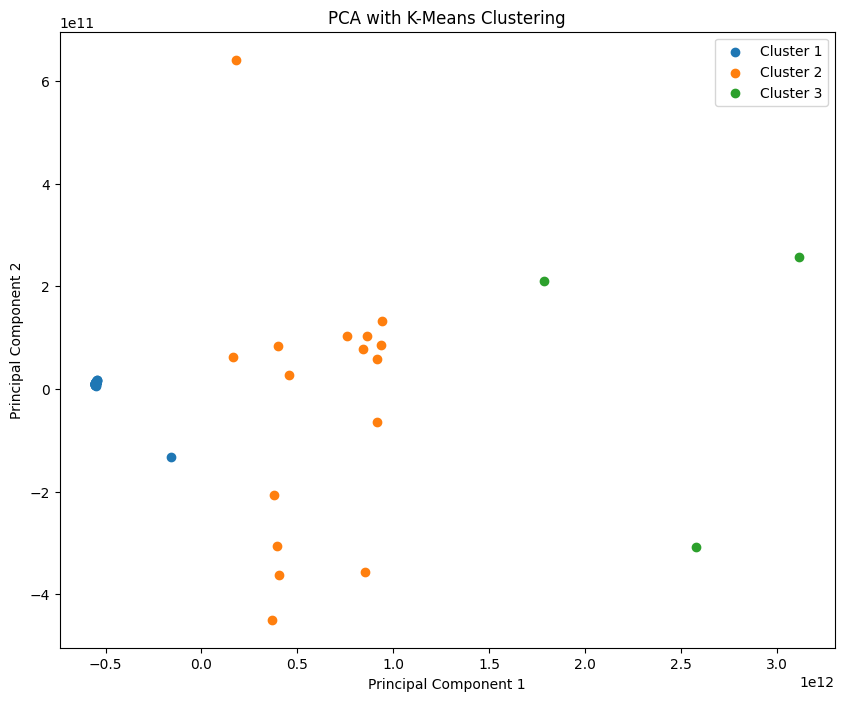

In [238]:
# prompt: ตอบคำถามว่า data มีทั้งหมดกี่กลุ่ม โดย plot จุดข้อมูลแต่ละกลุ่มเป็นคนละสี

# จากกราฟ PCA ที่แสดงจุดข้อมูลทั้ง 51 จุด เราสามารถสังเกตเห็นการจัดกลุ่มของข้อมูลได้เบื้องต้น
# อย่างไรก็ตาม การกำหนดจำนวนกลุ่มที่แน่นอนนั้นขึ้นอยู่กับวิธีการจัดกลุ่ม (clustering) และเกณฑ์ที่ใช้

# ในกรณีนี้ เราสามารถใช้ K-Means Clustering เพื่อช่วยในการจัดกลุ่มข้อมูล
from sklearn.cluster import KMeans

# เลือกจำนวนกลุ่ม (k) ที่เหมาะสม
# คุณอาจลองใช้วิธี Elbow Method หรือ Silhouette Score เพื่อหา k ที่เหมาะสม
kmeans = KMeans(n_clusters=3) # ตั้งค่า k เป็น 3

# ทำการจัดกลุ่มข้อมูล
kmeans.fit(principalDf)

# ได้ label กลุ่มของแต่ละจุด
labels = kmeans.labels_

# plot จุดข้อมูลแต่ละกลุ่มเป็นคนละสี
plt.figure(figsize=(10, 8))
for i in range(3):
  plt.scatter(principalDf['principal component 1'][labels == i], principalDf['principal component 2'][labels == i], label=f'Cluster {i+1}')
plt.xlabel('Principal Component 1')
plt.ylabel(
  'Principal Component 2')
plt.title('PCA with K-Means Clustering')
plt.legend()
plt.show()

# สร้าง ตารางที่มี column บอกว่า data แต่ละจุดนั้นอยู่กลุ่มไหน

กลุ่ม 1 (Cluster 1)

ช่วงค่าความเข้มข้น: 0 - 2.5
ความหมาย: ค่าต่ำ - อาจมีการขาดสาร



กลุ่ม 2 (Cluster 2):

ช่วงค่าความเข้มข้น: 2.6 - 5.0
ความหมาย: ค่าปานกลาง - ระดับปกติ



กลุ่ม 3 (Cluster 3):

ช่วงค่าความเข้มข้น: 5.1 - 9.5
ความหมาย: ค่าค่อนข้างสูง - ต้องเฝ้าระวัง

In [249]:
import pandas as pd

# สมมุติว่า principalDf คือ DataFrame ที่ประกอบด้วยข้อมูล PCA และ labels คือผลจาก K-Means
principalDf['Cluster'] = labels  # เพิ่มคอลัมน์ Cluster

# สร้างตารางสรุป
summary_table = principalDf.groupby('Cluster').agg({
    'principal component 1': ['min', 'max', 'mean'],
    'principal component 2': ['min', 'max', 'mean'],
    'Cluster': 'count'
}).reset_index()

summary_table.columns = ['Cluster', 'PC1_min', 'PC1_max', 'PC1_mean', 'PC2_min', 'PC2_max', 'PC2_mean', 'Count']

summary_table

,Cluster,PC1_min,PC1_max,PC1_mean,PC2_min,PC2_max,PC2_mean,Count
0,0,-5.554593e+11,-1.604850e+11,-5.395198e+11,-1.326686e+11,1.813320e+10,6.658566e+09,32
1,1,1.640631e+11,9.407931e+11,6.110836e+11,-4.500186e+11,6.420018e+11,-2.324334e+10,16
2,2,1.789102e+12,3.118964e+12,2.495766e+12,-3.089496e+11,2.581740e+11,5.293979e+10,3
